In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data1 = pd.read_csv(r'C:\Users\PRACHI\Downloads\Data Analysis Exercise_Machstatz (1)\Data Analysis Exercise_Machstatz\trainingData.csv')

In [4]:
df = data1.copy()

In [5]:
pd.options.display.max_columns = None

In [6]:
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [7]:
df.shape

(40000, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

## HANDLING NULL VALUES

In [9]:
df.isnull().sum().sort_values(ascending = False)

social_class             5255
water_availabity         5253
secondary_business       5241
city                     1864
type_of_house             694
home_ownership            379
sanitary_availability     208
monthly_expenses          120
loan_purpose               26
primary_business           26
loan_amount                 0
age                         0
sex                         0
young_dependents            0
annual_income               0
old_dependents              0
loan_installments           0
occupants_count             0
house_area                  0
loan_tenure                 0
Id                          0
dtype: int64

In [10]:
(5255/40000)*100

13.1375

Thus, null values represent approx. 13% values of our dataset. Thus, it would not be vise to remove them.
For categorical columns, we can use mode to fill NaN values.
For continuous columns, we can use median/mean.

Let us first treat categorical columns.

In [11]:
df['social_class']=df['social_class'].fillna(df['social_class'].mode()[0])
df['city']=df['city'].fillna(df['city'].mode()[0])
df['primary_business']=df['primary_business'].fillna(df['primary_business'].mode()[0])
df['secondary_business']=df['secondary_business'].fillna(df['secondary_business'].mode()[0])
df['type_of_house']=df['type_of_house'].fillna(df['type_of_house'].mode()[0])
df['sanitary_availability']=df['sanitary_availability'].fillna(df['sanitary_availability'].mode()[0])                                                      
df['water_availabity']=df['water_availabity'].fillna(df['water_availabity'].mode()[0])
df['loan_purpose']=df['loan_purpose'].fillna(df['loan_purpose'].mode()[0])
df['home_ownership']=df['home_ownership'].fillna(df['home_ownership'].mode()[0])

Now, let's treat continuous variable.

In [12]:
df['monthly_expenses']=df['monthly_expenses'].fillna(df['monthly_expenses'].mean())

In [13]:
df.isnull().sum()

Id                       0
city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

Thus, now we have 0 null value.

## Removing Outliers

In [14]:
non_categorical_columns = df.select_dtypes(exclude = ['object']).drop(['loan_amount'], axis=1).columns
non_categorical_columns

Index(['Id', 'age', 'annual_income', 'monthly_expenses', 'old_dependents',
       'young_dependents', 'home_ownership', 'occupants_count', 'house_area',
       'sanitary_availability', 'water_availabity', 'loan_tenure',
       'loan_installments'],
      dtype='object')

In [15]:
def remove_outliers(data2, features):
    for c in features :
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3-Q1
        data1 = data2[(data2[c]<Q3+1.5*IQR)&(data2[c]>Q1-1.5*IQR)]
    return data1

In [16]:
df = remove_outliers(df, non_categorical_columns)

In [17]:
df.shape

(40000, 21)

In [18]:
df.age.unique()

array([    22,     21,     24,     26,     23,     28,     38,     25,
           34,     37,     50,     54,     57,     48,     32,     35,
           43,     51,     39,     41,     46,     45,     44,     47,
           40,     42,     33,     53,     30,     29,     36,     19,
           27,     20,     55,     49,     31,     52,     58,     56,
           18,     59,     60,     61,     63,     64,     62,     65,
           67,     70,    205, 766105,     74,      2,    288,     69,
           66,     72,     68,     82,     88,     75], dtype=int64)

205, 766105,2,288 are insignifacnt

In [19]:
m = df[(df['age'] ==205)].index
df = df.drop(m)

In [20]:
k = df[(df['age'] ==766105)].index
df = df.drop(k)

In [21]:
p = df[(df['age'] ==2)].index
df = df.drop(p)

In [22]:
k = df[(df['age'] ==288)].index
df = df.drop(k)

## CORRELATION MATRIX

In [23]:
correlation_matrix = df.corr()
correlation_matrix

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
Id,1.000000,0.049552,0.472388,-0.021391,0.044035,0.109432,0.093362,0.007439,0.037255,-0.000277,0.276630,-0.062601,-0.225170,0.141231
age,0.049552,1.000000,0.058966,-0.015621,0.137694,-0.231902,0.038760,-0.001110,0.006819,-0.029948,-0.009746,-0.049430,-0.050045,0.009409
annual_income,0.472388,0.058966,1.000000,0.112206,0.062189,0.239734,0.009520,0.003999,0.033886,0.235343,0.059999,-0.027625,-0.119906,0.085601
monthly_expenses,-0.021391,-0.015621,0.112206,1.000000,-0.003524,0.028695,-0.047004,0.001320,-0.008271,0.059534,0.063374,-0.013020,0.113805,0.019563
old_dependents,0.044035,0.137694,0.062189,-0.003524,1.000000,-0.093812,0.008236,-0.000987,0.010849,0.028244,-0.042847,-0.022390,-0.033916,0.006991
young_dependents,0.109432,-0.231902,0.239734,0.028695,-0.093812,1.000000,0.023243,0.004191,0.017863,0.222632,-0.158101,-0.015782,-0.064750,0.006168
home_ownership,0.093362,0.038760,0.009520,-0.047004,0.008236,0.023243,1.000000,0.000858,0.009342,0.039234,-0.009434,-0.097613,0.020962,0.001616
occupants_count,0.007439,-0.001110,0.003999,0.001320,-0.000987,0.004191,0.000858,1.000000,-0.000263,0.003526,0.004192,-0.000133,-0.002887,-0.000125
house_area,0.037255,0.006819,0.033886,-0.008271,0.010849,0.017863,0.009342,-0.000263,1.000000,0.040266,-0.013911,0.001176,-0.027504,0.002871
sanitary_availability,-0.000277,-0.029948,0.235343,0.059534,0.028244,0.222632,0.039234,0.003526,0.040266,1.000000,-0.069160,0.007579,0.173811,0.041532


<AxesSubplot:title={'center':'Correlation Matrix'}>

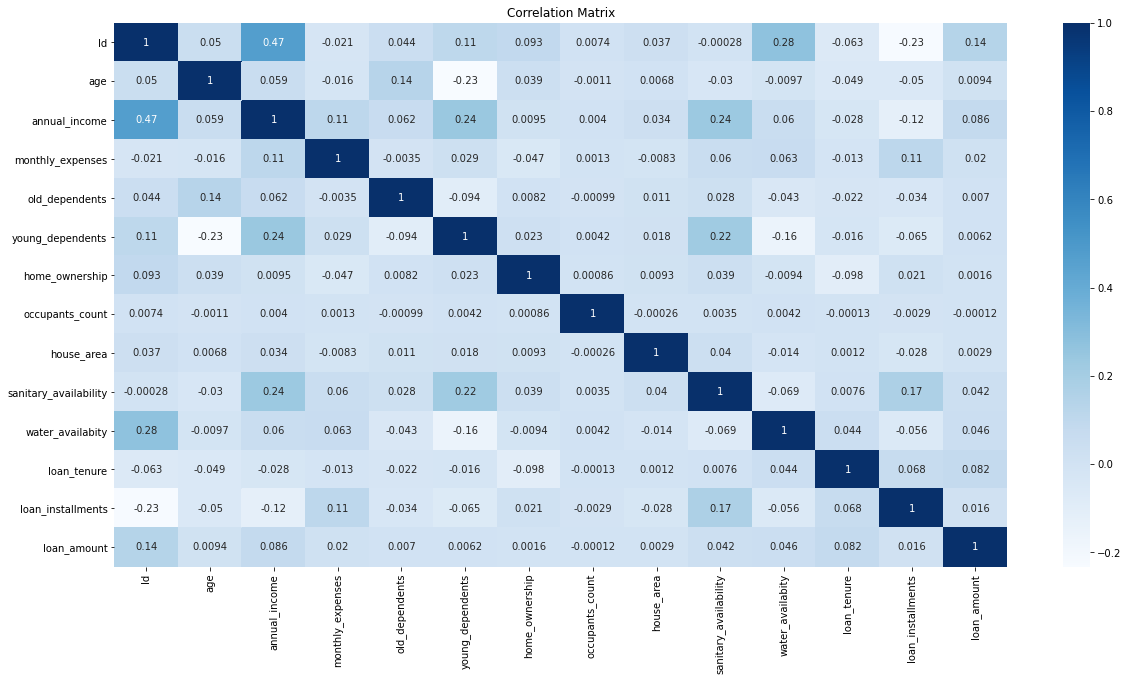

In [24]:
plt.figure(figsize = (20, 10))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot = True, cmap="Blues")

# 1.Personal features like age, sex, city, social_class, Id

In [25]:
X_personal = pd.DataFrame(df, columns = {'Id', 'city', 'age', 'sex'})
X_personal

,Id,city,age,sex
0,1,Dhanbad,22,F
1,2,Manjapra,21,F
2,3,Dhanbad,24,M
3,4,Pusad,26,F
4,5,Nuapada,23,F
...,...,...,...,...
39995,39996,Pusad,45,F
39996,39997,Pusad,35,F
39997,39998,Pusad,35,F
39998,39999,Pusad,28,F


In [26]:
df.groupby('sex')['sex'].count()

sex
F     37617
M      2371
TG        7
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

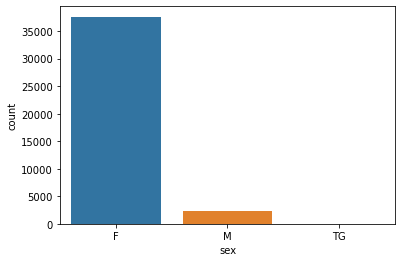

In [27]:
sns.countplot(x = 'sex', data = X_personal)

In [28]:
X_Sex = pd.get_dummies(X_personal['sex'], prefix = 'sex', drop_first = True)
X_Sex

,sex_M,sex_TG
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
39995,0,0
39996,0,0
39997,0,0
39998,0,0


# 2. Financial details like primary_business, secondary_business, annual_income, monthly_expenses, old_dependents, young_dependents

In [29]:
X_financial = pd.DataFrame(df, columns = {'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 
                                          'old_dependents', 'young_dependents'})
X_financial

,old_dependents,annual_income,young_dependents,primary_business,monthly_expenses,secondary_business
0,0,36000.0,2,Tailoring,5000.0,Others
1,1,94000.0,1,Tailoring,3600.0,none
2,0,48000.0,2,Beauty salon,4000.0,Others
3,0,7000.0,2,Tailoring,5000.0,none
4,0,36000.0,0,General store,3500.0,Agriculture
...,...,...,...,...,...,...
39995,0,78000.0,0,Buffalo rearing,4000.0,none
39996,0,48000.0,3,Tailoring,4000.0,none
39997,0,48000.0,2,Goat rearing,3500.0,none
39998,0,48000.0,3,Goat rearing,4000.0,none


In [30]:
X_financial['young_dependents'].unique()

array([2, 1, 0, 3, 4, 5, 6, 7], dtype=int64)

In [31]:
X_financial['old_dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [32]:
X_financial['secondary_business'].unique()

array(['Others', 'none', 'Agriculture', 'Daily wage labourer',
       'Livestock rearing'], dtype=object)

<AxesSubplot:xlabel='secondary_business', ylabel='count'>

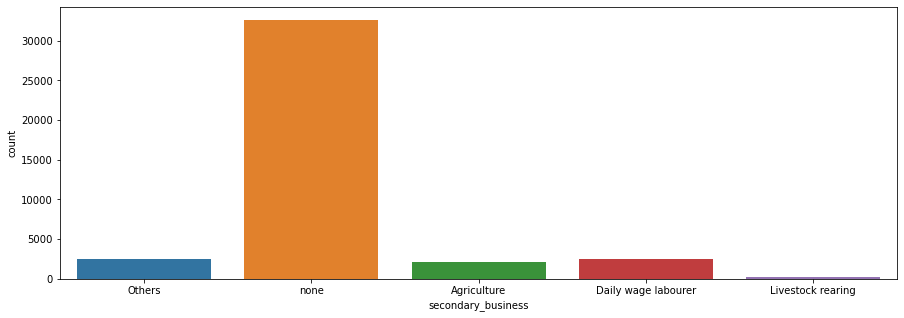

In [33]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'secondary_business', data =X_financial )

In [34]:
X_financial['sec_business'] = X_financial['secondary_business'].apply(lambda x : 'NO' if (x =='none') else 'YES')
X_financial['sec_business']

0        YES
1         NO
2        YES
3         NO
4        YES
        ... 
39995     NO
39996     NO
39997     NO
39998     NO
39999     NO
Name: sec_business, Length: 39995, dtype: object

In [35]:
X_secondary_business = pd.get_dummies(X_financial['sec_business'], prefix = 'secondary_business', drop_first = True)
X_secondary_business

,secondary_business_YES
0,1
1,0
2,1
3,0
4,1
...,...
39995,0
39996,0
39997,0
39998,0


# 3. HOUSE DETAILS (home_ownership, type_of_house, occupants_count, house_area, sanitary_availability,water_availability)

In [36]:
X_house_details=pd.DataFrame(df,columns={"home_ownership","type_of_house","occupants_count",
                                             "house_area","sanitary_availability","water_availabity"})
X_house_details.head()

,occupants_count,sanitary_availability,type_of_house,house_area,home_ownership,water_availabity
0,4,1.0,R,70.0,1.0,0.5
1,4,1.0,T1,80.0,1.0,0.5
2,4,1.0,T1,50.0,1.0,0.5
3,5,1.0,T1,50.0,1.0,0.5
4,1,1.0,T1,112.0,1.0,0.5


<AxesSubplot:xlabel='type_of_house', ylabel='count'>

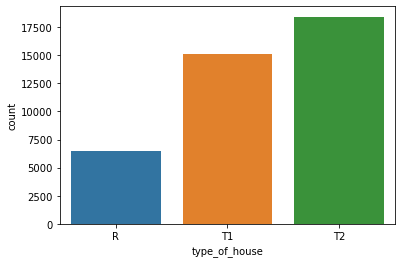

In [37]:
sns.countplot(x = 'type_of_house', data = X_house_details)

In [38]:
X_type_house = pd.get_dummies(X_house_details['type_of_house'], prefix = 'type_of_house', drop_first=True)
X_type_house

,type_of_house_T1,type_of_house_T2
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
39995,0,1
39996,0,1
39997,0,1
39998,0,1


# 4. LOAN DETAILS

loan_purpose, loan_tenure, loan_installments, loan_amount 
(these contain loan details of loans that have been previously given, and which have been repaid)

In [39]:
X_loan_details = pd.DataFrame(df,columns={"loan_purpose","loan_tenure","loan_installments","loan_amount"})
X_loan_details.head()

,loan_amount,loan_installments,loan_purpose,loan_tenure
0,5000.0,12,Apparels,12
1,7500.0,50,Apparels,12
2,5000.0,12,Beauty Salon,12
3,7500.0,50,Apparels,12
4,5000.0,12,Retail Store,12


<AxesSubplot:xlabel='loan_tenure', ylabel='count'>

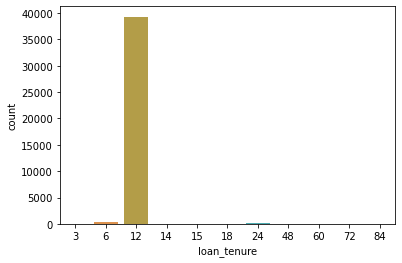

In [40]:
sns.countplot(x = 'loan_tenure', data = X_loan_details )

<AxesSubplot:xlabel='loan_installments', ylabel='count'>

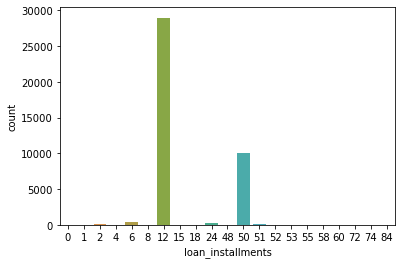

In [41]:
sns.countplot(x = 'loan_installments', data = X_loan_details)

# MODELLING

In [42]:
X1 = pd.concat([X_type_house,X_Sex, X_secondary_business ], axis=1)

In [43]:
X1.head()

,type_of_house_T1,type_of_house_T2,sex_M,sex_TG,secondary_business_YES
0,0,0,0,0,1
1,1,0,0,0,0
2,1,0,1,0,1
3,1,0,0,0,0
4,1,0,0,0,1


In [44]:
X2 = pd.DataFrame(df, columns = {'old_dependents', 'loan_installments', 'loan_tenure', 'home_ownership', 'young_dependents', 
                                 'monthly_expenses', 'annual_income', 'age', 'house_area', 'Id', 'occupants_count'})

In [45]:
X0 = pd.concat([X1, X2], axis=1)

In [46]:
X0.head()

,type_of_house_T1,type_of_house_T2,sex_M,sex_TG,secondary_business_YES,old_dependents,loan_tenure,young_dependents,annual_income,age,loan_installments,occupants_count,house_area,Id,home_ownership,monthly_expenses
0,0,0,0,0,1,0,12,2,36000.0,22,12,4,70.0,1,1.0,5000.0
1,1,0,0,0,0,1,12,1,94000.0,21,50,4,80.0,2,1.0,3600.0
2,1,0,1,0,1,0,12,2,48000.0,24,12,4,50.0,3,1.0,4000.0
3,1,0,0,0,0,0,12,2,7000.0,26,50,5,50.0,4,1.0,5000.0
4,1,0,0,0,1,0,12,0,36000.0,23,12,1,112.0,5,1.0,3500.0


In [47]:
y = df['loan_amount']

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X0,y)

ExtraTreesRegressor()

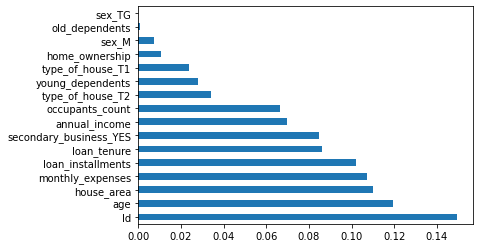

In [49]:
importance = pd.Series(model.feature_importances_, index=X0.columns)
importance.nlargest(16).plot(kind='barh')
plt.show()

We can drop sex_TG

In [50]:
X = X0.drop(['sex_TG'], axis=1)
X.head()

,type_of_house_T1,type_of_house_T2,sex_M,secondary_business_YES,old_dependents,loan_tenure,young_dependents,annual_income,age,loan_installments,occupants_count,house_area,Id,home_ownership,monthly_expenses
0,0,0,0,1,0,12,2,36000.0,22,12,4,70.0,1,1.0,5000.0
1,1,0,0,0,1,12,1,94000.0,21,50,4,80.0,2,1.0,3600.0
2,1,0,1,1,0,12,2,48000.0,24,12,4,50.0,3,1.0,4000.0
3,1,0,0,0,0,12,2,7000.0,26,50,5,50.0,4,1.0,5000.0
4,1,0,0,1,0,12,0,36000.0,23,12,1,112.0,5,1.0,3500.0


In [196]:
X.columns

Index(['type_of_house_T1', 'type_of_house_T2', 'sex_M',
       'secondary_business_YES', 'old_dependents', 'loan_tenure',
       'young_dependents', 'annual_income', 'age', 'loan_installments',
       'occupants_count', 'house_area', 'Id', 'home_ownership',
       'monthly_expenses'],
      dtype='object')

In [51]:
X.shape

(39995, 15)

In [52]:
from sklearn.model_selection import train_test_split
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= SEED)

In [53]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score


# LINEAR REGRESSION

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred_lm=lm.predict(X_test)

In [57]:
y_pred_lm = pd.DataFrame(y_pred_lm ,columns={"Predicted_loan_amount"})
y_pred_lm.head()

,Predicted_loan_amount
0,8996.264570
1,4536.489691
2,6518.222102
3,11701.428046
4,6241.658728


In [58]:
y_test1=y_test.copy()

In [59]:
y_test1=y_test1.reset_index()
y_test2=pd.DataFrame(y_test1,columns={"loan_amount"})
y_test2.head()

,loan_amount
0,15000.0
1,5000.0
2,5000.0
3,8000.0
4,5000.0


In [60]:
lm_merged = pd.concat([y_pred_lm,y_test2],axis=1)
lm_merged.head(10)

,Predicted_loan_amount,loan_amount
0,8996.264570,15000.0
1,4536.489691,5000.0
2,6518.222102,5000.0
3,11701.428046,8000.0
4,6241.658728,5000.0
5,9254.345130,10000.0
6,10988.382780,9000.0
7,6873.604791,5000.0
8,6669.706280,5000.0
9,6601.669671,5000.0


<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

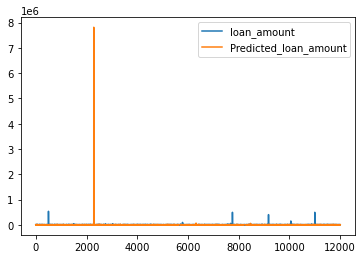

In [61]:
plt.figure(figsize = (20,10))
lm_merged[['loan_amount','Predicted_loan_amount']].plot()

In [62]:
print('MAE:', MAE(y_test, y_pred_lm))
print('MSE:', MSE(y_test, y_pred_lm))
print('RMSE:', np.sqrt(MSE(y_test, y_pred_lm)))
print('R2 Score:', r2_score(y_test, y_pred_lm))

MAE: 2846.0350938065803
MSE: 5165119035.801378
RMSE: 71868.76258710302
R2 Score: -56.33958051434181


Since, R2 score is negatice, we cannot use Linear Regression  model.

In [63]:
lm_merged['error_rate'] = (abs(lm_merged['loan_amount']-lm_merged['Predicted_loan_amount'])/lm_merged['loan_amount'])*100

In [64]:
lm_merged.head()

,Predicted_loan_amount,loan_amount,error_rate
0,8996.264570,15000.0,40.024903
1,4536.489691,5000.0,9.270206
2,6518.222102,5000.0,30.364442
3,11701.428046,8000.0,46.267851
4,6241.658728,5000.0,24.833175


In [65]:
#mean error rate
lm_mean_error=lm_merged.error_rate.mean()
#calculating accuracy
lm_mean_accuracy=100-lm_mean_error
lm_mean_accuracy

63.81119095274796

Accuracy rate is just 63.8%

# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
dt=DecisionTreeRegressor(criterion='mse')
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [68]:
y_pred_dt=dt.predict(X_test)

In [69]:
y_pred_dt = pd.DataFrame(y_pred_dt ,columns={"Predicted_loan_amount"})
y_pred_dt.head()

,Predicted_loan_amount
0,8000.0
1,5000.0
2,5000.0
3,8000.0
4,5000.0


In [70]:
dt_merged = pd.concat([y_pred_dt,y_test2],axis=1)
dt_merged.head(10)

,Predicted_loan_amount,loan_amount
0,8000.0,15000.0
1,5000.0,5000.0
2,5000.0,5000.0
3,8000.0,8000.0
4,5000.0,5000.0
5,10000.0,10000.0
6,9000.0,9000.0
7,5000.0,5000.0
8,5000.0,5000.0
9,5000.0,5000.0


<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

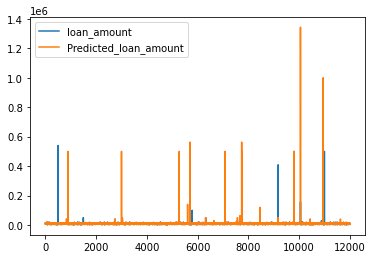

In [71]:
plt.figure(figsize = (20,10))
dt_merged[['loan_amount','Predicted_loan_amount']].plot()

In [72]:
print('MAE:', MAE(y_test, y_pred_dt))
print('MSE:', MSE(y_test, y_pred_dt))
print('RMSE:', np.sqrt(MSE(y_test, y_pred_dt)))

MAE: 1610.517543128594
MSE: 428554087.84065336
RMSE: 20701.54795759615


In [73]:
dt_merged['error_rate'] = (abs(dt_merged['loan_amount']-dt_merged['Predicted_loan_amount'])/dt_merged['loan_amount'])*100

In [74]:
dt_merged.head()

,Predicted_loan_amount,loan_amount,error_rate
0,8000.0,15000.0,46.666667
1,5000.0,5000.0,0.000000
2,5000.0,5000.0,0.000000
3,8000.0,8000.0,0.000000
4,5000.0,5000.0,0.000000


In [75]:
#mean error rate
dt_mean_error=dt_merged.error_rate.mean()
#calculating accuracy
dt_mean_accuracy=100-dt_mean_error
dt_mean_accuracy

85.55854912233877

Using DT Regressor, our accuracy score becomes 86.4%

# RANDOM FOREST REGRESSOR

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
y_pred_rf=rf.predict(X_test)

In [78]:
y_pred_rf=pd.DataFrame(y_pred_rf,columns={"Predicted_loan_amount"})
y_pred_rf.head()

,Predicted_loan_amount
0,11795.0
1,5000.0
2,6011.0
3,9030.0
4,5110.0


In [79]:
rf_merged = pd.concat([y_pred_rf,y_test2],axis=1)
rf_merged.head(10)

,Predicted_loan_amount,loan_amount
0,11795.0,15000.0
1,5000.0,5000.0
2,6011.0,5000.0
3,9030.0,8000.0
4,5110.0,5000.0
5,10000.0,10000.0
6,10639.0,9000.0
7,5020.0,5000.0
8,4989.0,5000.0
9,5355.0,5000.0


<AxesSubplot:>

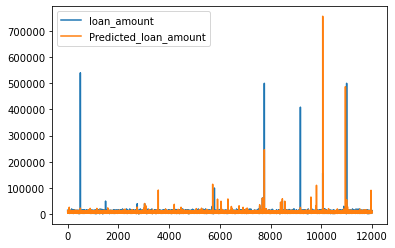

In [80]:
rf_merged[['loan_amount','Predicted_loan_amount']].plot()

In [81]:
print('MAE:', MAE(y_test,y_pred_rf ))
print('MSE:', MSE(y_test, y_pred_rf))
print('RMSE:', np.sqrt(MSE(y_test, y_pred_rf)))

MAE: 1240.196849737478
MSE: 112566757.67930661
RMSE: 10609.748238262142


In [82]:
rf_merged['error_rate']=(abs(rf_merged['loan_amount']-rf_merged['Predicted_loan_amount'])/rf_merged['loan_amount'])*100

In [83]:
rf_merged.head()

,Predicted_loan_amount,loan_amount,error_rate
0,11795.0,15000.0,21.366667
1,5000.0,5000.0,0.000000
2,6011.0,5000.0,20.220000
3,9030.0,8000.0,12.875000
4,5110.0,5000.0,2.200000


In [84]:
#mean error rate
rf_mean_error=rf_merged.error_rate.mean()
#calculating accuracy
rf_mean_accuracy=100-rf_mean_error
rf_mean_accuracy

87.60598012607542

Using RF Regressor, our accuracy score becomes 87.2%

# CITY
### Since city is a categorical variable so we need to perform encoding.
### Since it has many categories so we can take top 10 most frequent categories. 

In [85]:
df_new2 = pd.DataFrame(df,columns={"city"})
df_new2.head()

,city
0,Dhanbad
1,Manjapra
2,Dhanbad
3,Pusad
4,Nuapada


In [86]:
pd.options.display.max_rows = None

In [87]:
city_group_value = df.groupby('city')['city'].count()
city_sorted = city_group_value.sort_values(ascending = False)
city_sorted

city
Pusad                                      5017
Bahoriband                                 1979
PUSAD                                      1776
Shantipur                                  1727
Imphal                                     1699
Mathurapur                                 1361
SANDESHKHALI                               1087
Joynagar                                    993
Gwalior                                     952
Kozhinjampara                               897
Muzaffarpur                                 843
Nuapada                                     782
Baruipur                                    730
Pune                                        637
Parola                                      637
GWALIOR                                     635
Jhabua                                      602
Balasore                                    553
Puri                                        546
Sambalpur                                   496
Santipur                           

In [88]:
city_top_10 = city_sorted[0:10]
city_top_10

city
Pusad            5017
Bahoriband       1979
PUSAD            1776
Shantipur        1727
Imphal           1699
Mathurapur       1361
SANDESHKHALI     1087
Joynagar          993
Gwalior           952
Kozhinjampara     897
Name: city, dtype: int64

In [89]:
cities_10= df_new2['city'].value_counts().sort_values(ascending=False).head(10).index
cities_10=list(cities_10)
cities_10

['Pusad',
 'Bahoriband',
 'PUSAD',
 'Shantipur',
 'Imphal',
 'Mathurapur',
 'SANDESHKHALI',
 'Joynagar',
 'Gwalior',
 'Kozhinjampara']

In [90]:
for categories in cities_10:
    df_new2[categories]=np.where(df_new2['city']==categories,1,0)
df_new2.head()
df_new3 = df_new2.add_suffix('cityy')
df_new3.head()

,citycityy,Pusadcityy,Bahoribandcityy,PUSADcityy,Shantipurcityy,Imphalcityy,Mathurapurcityy,SANDESHKHALIcityy,Joynagarcityy,Gwaliorcityy,Kozhinjamparacityy
0,Dhanbad,0,0,0,0,0,0,0,0,0,0
1,Manjapra,0,0,0,0,0,0,0,0,0,0
2,Dhanbad,0,0,0,0,0,0,0,0,0,0
3,Pusad,1,0,0,0,0,0,0,0,0,0
4,Nuapada,0,0,0,0,0,0,0,0,0,0


In [91]:
df_4 = df_new3.drop(['citycityy'], axis =1)

In [92]:
df_4.head()

,Pusadcityy,Bahoribandcityy,PUSADcityy,Shantipurcityy,Imphalcityy,Mathurapurcityy,SANDESHKHALIcityy,Joynagarcityy,Gwaliorcityy,Kozhinjamparacityy
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [93]:
X12=pd.concat([X, df_4],axis=1)
X12.head()

,type_of_house_T1,type_of_house_T2,sex_M,secondary_business_YES,old_dependents,loan_tenure,young_dependents,annual_income,age,loan_installments,occupants_count,house_area,Id,home_ownership,monthly_expenses,Pusadcityy,Bahoribandcityy,PUSADcityy,Shantipurcityy,Imphalcityy,Mathurapurcityy,SANDESHKHALIcityy,Joynagarcityy,Gwaliorcityy,Kozhinjamparacityy
0,0,0,0,1,0,12,2,36000.0,22,12,4,70.0,1,1.0,5000.0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,12,1,94000.0,21,50,4,80.0,2,1.0,3600.0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,12,2,48000.0,24,12,4,50.0,3,1.0,4000.0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,12,2,7000.0,26,50,5,50.0,4,1.0,5000.0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,12,0,36000.0,23,12,1,112.0,5,1.0,3500.0,0,0,0,0,0,0,0,0,0,0


In [94]:
from sklearn.model_selection import train_test_split
SEED = 1
X1_train, X1_test, y_train, y_test = train_test_split(X12, y, test_size=0.3, random_state= SEED)

# LINEAR REGRESSION

In [95]:
lm1=LinearRegression()
lm1.fit(X1_train,y_train)

LinearRegression()

In [96]:
y_pred_lm1=lm1.predict(X1_test)

In [97]:
y_pred_lm1 = pd.DataFrame(y_pred_lm1,columns={"Predicted_loan_amount"})
y_pred_lm1.head()

,Predicted_loan_amount
0,8982.711719
1,4659.880069
2,6087.508815
3,12074.520470
4,5956.253456


In [98]:
lm_merged1 = pd.concat([y_pred_lm1,y_test2],axis=1)
lm_merged1.head(10)

,Predicted_loan_amount,loan_amount
0,8982.711719,15000.0
1,4659.880069,5000.0
2,6087.508815,5000.0
3,12074.520470,8000.0
4,5956.253456,5000.0
5,9495.901828,10000.0
6,11559.930099,9000.0
7,7672.460050,5000.0
8,8447.233260,5000.0
9,7653.351710,5000.0


<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

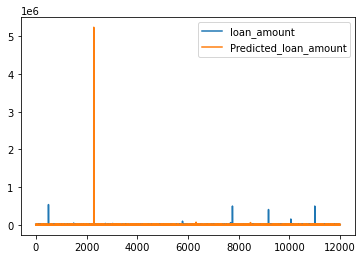

In [99]:
plt.figure(figsize = (20,10))
lm_merged1[['loan_amount','Predicted_loan_amount']].plot()

In [100]:
print('MAE:', MAE(y_test, y_pred_lm1))
print('MSE:', MSE(y_test, y_pred_lm1))
print('RMSE:', np.sqrt(MSE(y_test, y_pred_lm1)))
print('R2 Score:', r2_score(y_test, y_pred_lm1))

MAE: 2538.600808246302
MSE: 2367839201.168455
RMSE: 48660.4480165201
R2 Score: -25.28611375252619


Since, R2 Score is negative, we must not use this model.

In [101]:
lm_merged1['error_rate'] = (abs(lm_merged1['loan_amount']-lm_merged1['Predicted_loan_amount'])/lm_merged1['loan_amount'])*100

In [102]:
lm_merged1.head()

,Predicted_loan_amount,loan_amount,error_rate
0,8982.711719,15000.0,40.115255
1,4659.880069,5000.0,6.802399
2,6087.508815,5000.0,21.750176
3,12074.520470,8000.0,50.931506
4,5956.253456,5000.0,19.125069


In [160]:
#mean error rate
lm_mean_error1=lm_merged1.error_rate.mean()
#calculating accuracy
lm_mean_accuracy1=100-lm_mean_error1
lm_mean_accuracy1

67.63883396976973

Using Linear Regression, we get 67.6% accuracy rate.

# Decision Tree Regressor

In [104]:
dt1=DecisionTreeRegressor()
dt1.fit(X1_train,y_train)

DecisionTreeRegressor()

In [105]:
y_pred_dt1=dt1.predict(X1_test)

In [106]:
y_pred_dt1 = pd.DataFrame(y_pred_dt1,columns={"Predicted_loan_amount"})
y_pred_dt1.head()

,Predicted_loan_amount
0,15000.0
1,5000.0
2,5000.0
3,10000.0
4,5000.0


In [107]:
dt_merged1 = pd.concat([y_pred_dt1,y_test2],axis=1)
dt_merged1.head(10)

,Predicted_loan_amount,loan_amount
0,15000.0,15000.0
1,5000.0,5000.0
2,5000.0,5000.0
3,10000.0,8000.0
4,5000.0,5000.0
5,10000.0,10000.0
6,6000.0,9000.0
7,5000.0,5000.0
8,5000.0,5000.0
9,5000.0,5000.0


<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

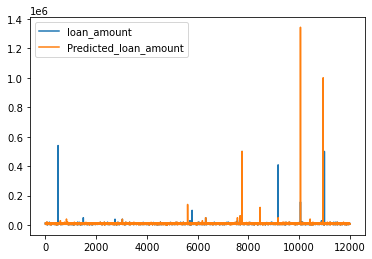

In [108]:
plt.figure(figsize = (20,10))
dt_merged1[['loan_amount','Predicted_loan_amount']].plot()

In [109]:
print('MAE:', MAE(y_test, y_pred_dt1))
print('MSE:', MSE(y_test, y_pred_dt1))
print('RMSE:', np.sqrt(MSE(y_test, y_pred_dt1)))

MAE: 1180.0316693057755
MSE: 259327532.29435787
RMSE: 16103.649657588738


In [110]:
dt_merged1['error_rate'] = (abs(dt_merged1['loan_amount']-dt_merged1['Predicted_loan_amount'])/dt_merged1['loan_amount'])*100

In [111]:
dt_merged1.head()

,Predicted_loan_amount,loan_amount,error_rate
0,15000.0,15000.0,0.0
1,5000.0,5000.0,0.0
2,5000.0,5000.0,0.0
3,10000.0,8000.0,25.0
4,5000.0,5000.0,0.0


In [179]:
#mean error rate
dt_mean_error1=dt_merged1.error_rate.mean()
#calculating accuracy
dt_mean_accuracy1=100-dt_mean_error1
dt_mean_accuracy1

89.13823273563767

Using DT Regressor, we get 89.1% accuracy rate.

# Random Forest Regressor

In [113]:
rf1=RandomForestRegressor()
rf1.fit(X1_train,y_train)

RandomForestRegressor()

In [114]:
y_pred_rf1=rf1.predict(X1_test)

In [115]:
y_pred_rf1 = pd.DataFrame(y_pred_rf1,columns={"Predicted_loan_amount"})
y_pred_rf1.head()

,Predicted_loan_amount
0,11310.0
1,5000.0
2,5157.0
3,8460.0
4,5100.0


In [116]:
rf_merged1 = pd.concat([y_pred_rf1,y_test2],axis=1)
rf_merged1.head(10)

,Predicted_loan_amount,loan_amount
0,11310.0,15000.0
1,5000.0,5000.0
2,5157.0,5000.0
3,8460.0,8000.0
4,5100.0,5000.0
5,10000.0,10000.0
6,10420.0,9000.0
7,5000.0,5000.0
8,5105.0,5000.0
9,5600.0,5000.0


<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

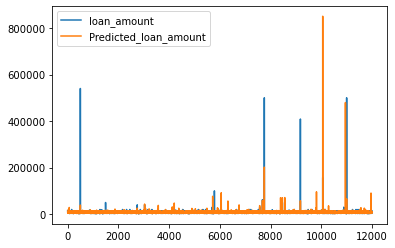

In [117]:
plt.figure(figsize = (20,10))
rf_merged1[['loan_amount','Predicted_loan_amount']].plot()

In [118]:
print('MAE:', MAE(y_test, y_pred_rf1))
print('MSE:', MSE(y_test, y_pred_rf1))
print('RMSE:', np.sqrt(MSE(y_test, y_pred_rf1)))

MAE: 1158.426368864072
MSE: 119088068.47170597
RMSE: 10912.747979849346


In [119]:
rf_merged1['error_rate'] = (abs(rf_merged1['loan_amount']-rf_merged1['Predicted_loan_amount'])/rf_merged1['loan_amount'])*100

In [120]:
rf_merged1.head()

,Predicted_loan_amount,loan_amount,error_rate
0,11310.0,15000.0,24.60
1,5000.0,5000.0,0.00
2,5157.0,5000.0,3.14
3,8460.0,8000.0,5.75
4,5100.0,5000.0,2.00


In [194]:
#mean error rate
rf_mean_error1=rf_merged1.error_rate.mean()
#calculating accuracy
rf_mean_accuracy1=100-rf_mean_error1
rf_mean_accuracy1

88.79232415260337

Using RF regressor, we get 88.79% accuracy rate.

# Loan Purpose
### Since loan purpose is a categorical variable so we need to perform encoding.
### Since it has many categories so we can take top 10 most frequent categories.

In [128]:
df_neww6 = pd.DataFrame(df,columns={"loan_purpose"})
df_neww6.head()

,loan_purpose
0,Apparels
1,Apparels
2,Beauty Salon
3,Apparels
4,Retail Store


In [129]:
loan_group_value = df.groupby('loan_purpose')['loan_purpose'].count()
loan_sorted = loan_group_value.sort_values(ascending = False)
loan_sorted

loan_purpose
Apparels                           7090
Agro Based Businesses              4728
Animal husbandry                   4421
Meat Businesses                    4300
Handicrafts                        4230
Farming/ Agriculture               3284
Education Loan                     2100
Retail Store                       1962
Eateries                           1831
Business Services - II              854
Tobacco Related Activities          852
Construction Related Activities     661
Retail Sale                         614
Artifical Jewellry Selling          556
Carpentery work                     299
Food Items                          285
Business Services - I               276
Transportation Services             245
Flower Business                     238
Beauty Salon                        204
Repair Services                     192
Laundry Services                    162
Agarbatti Business                  107
Utensil Selling                     104
Sanitation                 

In [130]:
loan_top_10 = loan_sorted[0:10]
loan_top_10

loan_purpose
Apparels                  7090
Agro Based Businesses     4728
Animal husbandry          4421
Meat Businesses           4300
Handicrafts               4230
Farming/ Agriculture      3284
Education Loan            2100
Retail Store              1962
Eateries                  1831
Business Services - II     854
Name: loan_purpose, dtype: int64

In [131]:
loans_10= df_neww6['loan_purpose'].value_counts().sort_values(ascending=False).head(10).index
loanss_10=list(loans_10)
loanss_10

['Apparels',
 'Agro Based Businesses',
 'Animal husbandry',
 'Meat Businesses',
 'Handicrafts',
 'Farming/ Agriculture',
 'Education Loan',
 'Retail Store',
 'Eateries',
 'Business Services - II']

In [135]:
for categories in loanss_10:
    df_neww6[categories]=np.where(df_neww6['loan_purpose']==categories,1,0)
df_neww6.head()


,loan_purpose,Apparels,Agro Based Businesses,Animal husbandry,Meat Businesses,Handicrafts,Farming/ Agriculture,Education Loan,Retail Store,Eateries,Business Services - II
0,Apparels,1,0,0,0,0,0,0,0,0,0
1,Apparels,1,0,0,0,0,0,0,0,0,0
2,Beauty Salon,0,0,0,0,0,0,0,0,0,0
3,Apparels,1,0,0,0,0,0,0,0,0,0
4,Retail Store,0,0,0,0,0,0,0,1,0,0


In [136]:
df_loan_1 = df_neww6.add_suffix('loann')
df_loan_1.head()

,loan_purposeloann,Apparelsloann,Agro Based Businessesloann,Animal husbandryloann,Meat Businessesloann,Handicraftsloann,Farming/ Agricultureloann,Education Loanloann,Retail Storeloann,Eateriesloann,Business Services - IIloann
0,Apparels,1,0,0,0,0,0,0,0,0,0
1,Apparels,1,0,0,0,0,0,0,0,0,0
2,Beauty Salon,0,0,0,0,0,0,0,0,0,0
3,Apparels,1,0,0,0,0,0,0,0,0,0
4,Retail Store,0,0,0,0,0,0,0,1,0,0


In [139]:
df_loan_new = df_loan_1.drop(['loan_purposeloann'], axis =1)

In [140]:
df_loan_new.head()

,Apparelsloann,Agro Based Businessesloann,Animal husbandryloann,Meat Businessesloann,Handicraftsloann,Farming/ Agricultureloann,Education Loanloann,Retail Storeloann,Eateriesloann,Business Services - IIloann
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [141]:
X121=pd.concat([X, df_loan_new],axis=1)
X121.head()

,type_of_house_T1,type_of_house_T2,sex_M,secondary_business_YES,old_dependents,loan_tenure,young_dependents,annual_income,age,loan_installments,occupants_count,house_area,Id,home_ownership,monthly_expenses,Apparelsloann,Agro Based Businessesloann,Animal husbandryloann,Meat Businessesloann,Handicraftsloann,Farming/ Agricultureloann,Education Loanloann,Retail Storeloann,Eateriesloann,Business Services - IIloann
0,0,0,0,1,0,12,2,36000.0,22,12,4,70.0,1,1.0,5000.0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,12,1,94000.0,21,50,4,80.0,2,1.0,3600.0,1,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,12,2,48000.0,24,12,4,50.0,3,1.0,4000.0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,12,2,7000.0,26,50,5,50.0,4,1.0,5000.0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,12,0,36000.0,23,12,1,112.0,5,1.0,3500.0,0,0,0,0,0,0,0,1,0,0


In [142]:
from sklearn.model_selection import train_test_split
SEED = 1
X4_train, X4_test, y_train, y_test = train_test_split(X121, y, test_size=0.3, random_state= SEED)

# LINEAR REGRESSION

In [144]:
lm4=LinearRegression()
lm4.fit(X4_train,y_train)

LinearRegression()

In [146]:
y_pred_lm4=lm4.predict(X4_test)

In [148]:
y_pred_lm4 = pd.DataFrame(y_pred_lm4,columns={"Predicted_loan_amount"})
y_pred_lm4.head()

,Predicted_loan_amount
0,8996.838000
1,4419.574694
2,6470.409259
3,11691.351941
4,6560.952298


In [150]:
lm_merged4 = pd.concat([y_pred_lm4,y_test2],axis=1)
lm_merged4.head(10)

,Predicted_loan_amount,loan_amount
0,8996.838000,15000.0
1,4419.574694,5000.0
2,6470.409259,5000.0
3,11691.351941,8000.0
4,6560.952298,5000.0
5,9515.919670,10000.0
6,10605.792418,9000.0
7,6859.744911,5000.0
8,6743.826381,5000.0
9,6413.711887,5000.0


<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

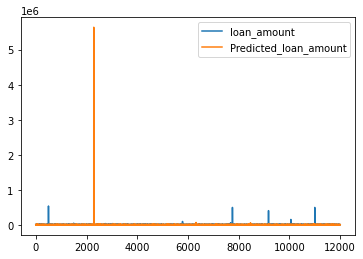

In [152]:
plt.figure(figsize = (20,10))
lm_merged4[['loan_amount','Predicted_loan_amount']].plot()

In [154]:
print('MAE:', MAE(y_test, y_pred_lm4))
print('MSE:', MSE(y_test, y_pred_lm4))
print('RMSE:', np.sqrt(MSE(y_test, y_pred_lm4)))
print('R2 Score:', r2_score(y_test, y_pred_lm4))

MAE: 2675.1744727999862
MSE: 2727517920.375749
RMSE: 52225.644279182896
R2 Score: -29.27901822119971


In [156]:
lm_merged4['error_rate'] = (abs(lm_merged4['loan_amount']-lm_merged4['Predicted_loan_amount'])/lm_merged4['loan_amount'])*100

In [158]:
lm_merged4.head()

,Predicted_loan_amount,loan_amount,error_rate
0,8996.838000,15000.0,40.021080
1,4419.574694,5000.0,11.608506
2,6470.409259,5000.0,29.408185
3,11691.351941,8000.0,46.141899
4,6560.952298,5000.0,31.219046


In [159]:
#mean error rate
lm_mean_error4=lm_merged4.error_rate.mean()
#calculating accuracy
lm_mean_accuracy4=100-lm_mean_error4
lm_mean_accuracy4

65.89933115318003

Using LR, we get 65.8% accuracy

# DECISION TREE REGRESSOR

In [162]:
dt4=DecisionTreeRegressor()
dt4.fit(X4_train,y_train)

DecisionTreeRegressor()

In [164]:
y_pred_dt4=dt4.predict(X4_test)

In [166]:
y_pred_dt4 = pd.DataFrame(y_pred_dt4,columns={"Predicted_loan_amount"})
y_pred_dt4.head()

,Predicted_loan_amount
0,15000.0
1,5000.0
2,5000.0
3,10000.0
4,5000.0


In [168]:
dt_merged4 = pd.concat([y_pred_dt4,y_test2],axis=1)
dt_merged4.head(10)

,Predicted_loan_amount,loan_amount
0,15000.0,15000.0
1,5000.0,5000.0
2,5000.0,5000.0
3,10000.0,8000.0
4,5000.0,5000.0
5,10000.0,10000.0
6,9000.0,9000.0
7,5000.0,5000.0
8,5000.0,5000.0
9,5000.0,5000.0


<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

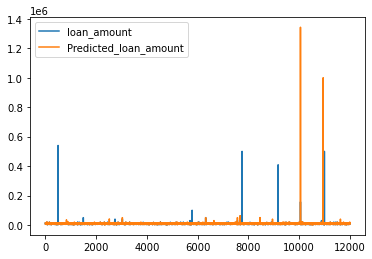

In [170]:
plt.figure(figsize = (20,10))
dt_merged4[['loan_amount','Predicted_loan_amount']].plot()

In [172]:
print('MAE:', MAE(y_test, y_pred_dt4))
print('MSE:', MSE(y_test, y_pred_dt4))
print('RMSE:', np.sqrt(MSE(y_test, y_pred_dt4)))

MAE: 1315.4346195516293
MSE: 281055328.7773981
RMSE: 16764.704852081293


In [174]:
dt_merged4['error_rate'] = (abs(dt_merged4['loan_amount']-dt_merged4['Predicted_loan_amount'])/dt_merged4['loan_amount'])*100

In [176]:
dt_merged4.head()

,Predicted_loan_amount,loan_amount,error_rate
0,15000.0,15000.0,0.0
1,5000.0,5000.0,0.0
2,5000.0,5000.0,0.0
3,10000.0,8000.0,25.0
4,5000.0,5000.0,0.0


In [180]:
#mean error rate
dt_mean_error4=dt_merged4.error_rate.mean()
#calculating accuracy
dt_mean_accuracy4=100-dt_mean_error4
dt_mean_accuracy4

88.06041829755065

Using DT Regressor, we get 88% accuracy.

# RANDOM FOREST REGRESSOR

In [182]:
rf4=RandomForestRegressor()
rf4.fit(X4_train,y_train)

RandomForestRegressor()

In [184]:
y_pred_rf4=rf4.predict(X4_test)

In [185]:
y_pred_rf4 = pd.DataFrame(y_pred_rf4,columns={"Predicted_loan_amount"})
y_pred_rf4.head()

,Predicted_loan_amount
0,71549.0
1,5000.0
2,5320.0
3,8170.0
4,5175.0


In [186]:
rf_merged4 = pd.concat([y_pred_rf4,y_test2],axis=1)
rf_merged4.head(10)

,Predicted_loan_amount,loan_amount
0,71549.0,15000.0
1,5000.0,5000.0
2,5320.0,5000.0
3,8170.0,8000.0
4,5175.0,5000.0
5,10000.0,10000.0
6,10810.0,9000.0
7,5020.0,5000.0
8,4980.0,5000.0
9,5175.0,5000.0


<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

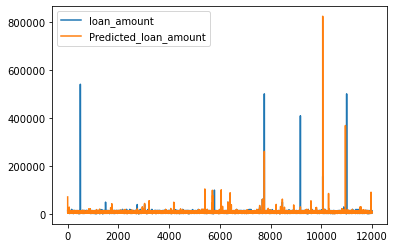

In [187]:
plt.figure(figsize = (20,10))
rf_merged4[['loan_amount','Predicted_loan_amount']].plot()

In [189]:
print('MAE:', MAE(y_test, y_pred_rf4))
print('MSE:', MSE(y_test, y_pred_rf4))
print('RMSE:', np.sqrt(MSE(y_test, y_pred_rf4)))

MAE: 1260.7715642970247
MSE: 116715168.32936078
RMSE: 10803.479454757193


In [191]:
rf_merged4['error_rate'] = (abs(rf_merged4['loan_amount']-rf_merged4['Predicted_loan_amount'])/rf_merged4['loan_amount'])*100

In [193]:
rf_merged4.head()

,Predicted_loan_amount,loan_amount,error_rate
0,71549.0,15000.0,376.993333
1,5000.0,5000.0,0.000000
2,5320.0,5000.0,6.400000
3,8170.0,8000.0,2.125000
4,5175.0,5000.0,3.500000


In [195]:
#mean error rate
rf_mean_error4=rf_merged4.error_rate.mean()
#calculating accuracy
rf_mean_accuracy4=100-rf_mean_error4
rf_mean_accuracy4

87.3946930932068